In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_5768\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
df = pd.read_csv('weather_forecast.csv')
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [14]:
df.shape

(14, 5)

In [15]:
from sklearn.datasets import make_classification


In [16]:
x,y = make_classification(
    n_features=4,
    n_classes=1,
    n_samples=14,
    random_state=1,
    n_clusters_per_class=1,
)

In [17]:
df["Play"].value_counts()

Play
Yes    9
No     5
Name: count, dtype: int64

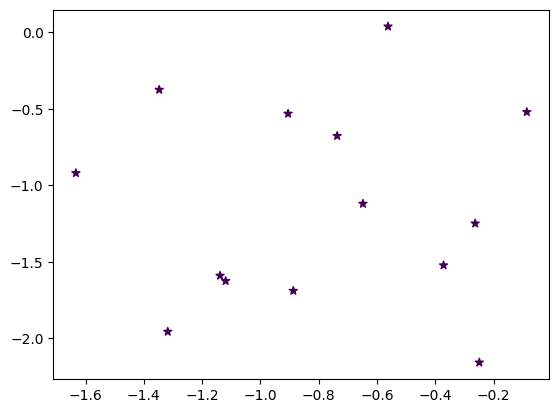

In [18]:
plt.scatter(x[:,0],x[:,1],c=y,marker='*')

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=1
)

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [22]:
y_predict = model.predict(x_test)
print("Actual : " , y_test)
print("Predicted : ", y_predict)

Actual :  [0 0 0 0 0]
Predicted :  [0 0 0 0 0]


In [23]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [25]:
accuracy = accuracy_score(y_predict,y_test)
print("Accuracy : ",accuracy)

Accuracy :  1.0


In [36]:
f1 = f1_score(y_test,y_predict,average='weighted')
print("F1 SCORE : ", f1)

F1 SCORE :  1.0


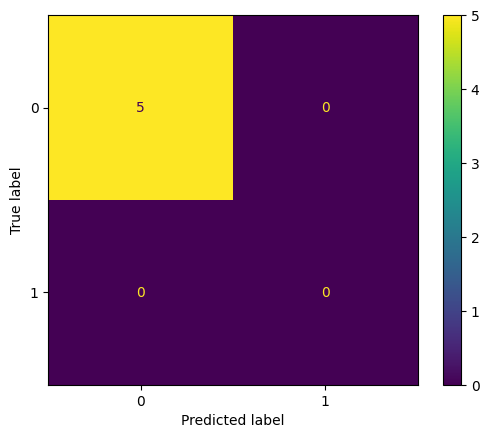

In [34]:
labels=[0,1]
confusion_mtrx  = confusion_matrix(y_test ,y_predict , labels=labels )
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mtrx , display_labels = labels)
display.plot()